In [1]:
%matplotlib inline
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

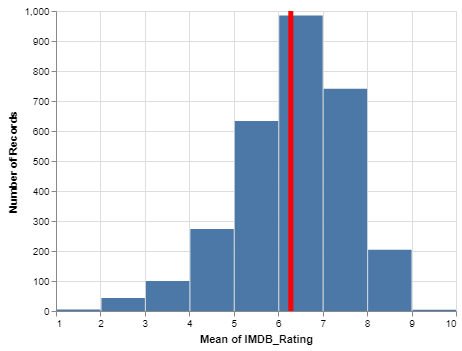

In [2]:
source = data.movies.url

base = alt.Chart(source)

# Global Mean

bar = base.mark_bar().encode(
    x=alt.X('IMDB_Rating:Q', 
            bin=True, axis=None),
    y='count()'
)

rule = base.mark_rule(color='red').encode(
    x='mean(IMDB_Rating):Q',
    size=alt.value(5)
)

bar + rule

# Layered Histogram

In [3]:
np.random.seed(56)

# Generating Data
source = pd.DataFrame({'Trial A': np.random.normal(0, 0.8, 1000),
                   'Trial B': np.random.normal(-2, 1, 1000),
                   'Trial C': np.random.normal(3, 2, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Experiment',
    value_name='Measurement'
)

source

,Experiment,Measurement
0,Trial A,-0.830115
1,Trial A,0.474927
2,Trial A,0.882144
3,Trial A,-0.409742
4,Trial A,-0.212336
5,Trial A,-1.293605
6,Trial A,-0.217212
7,Trial A,0.756443
8,Trial A,-0.501594
9,Trial A,-0.212758


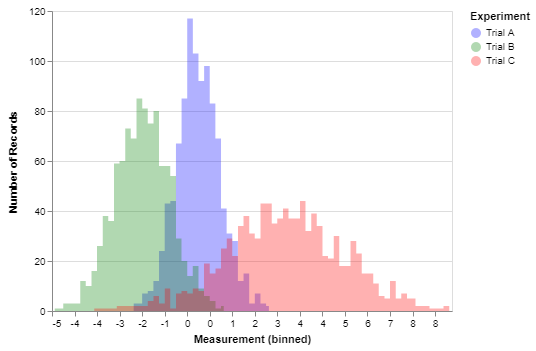

In [4]:
alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Experiment',
        scale=alt.Scale(range=['#0000ff', 
                               '#008000', '#ff0000'])
    )
)

# Trellis Histogram

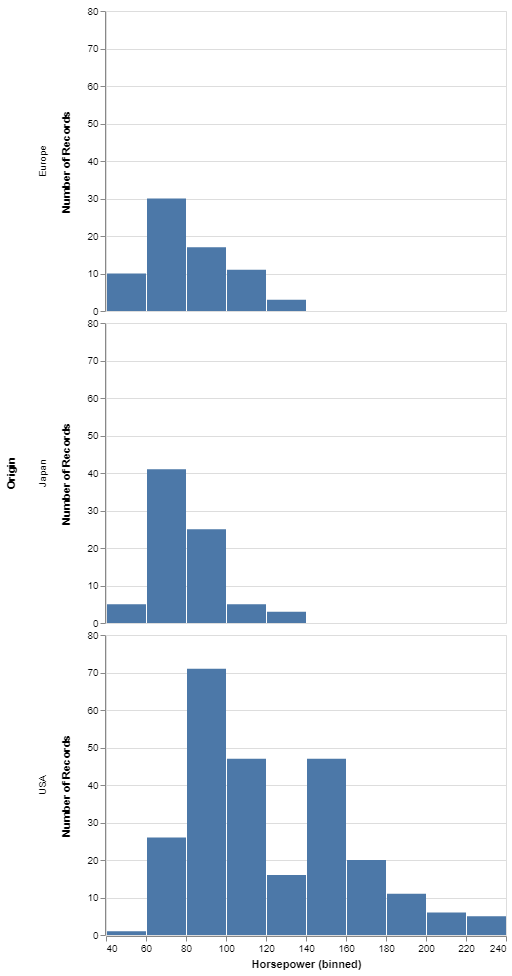

In [5]:
source = data.cars()

alt.Chart(source).mark_bar().encode(
    alt.X("Horsepower:Q", bin=True),
    y='count()',
    row='Origin'
)

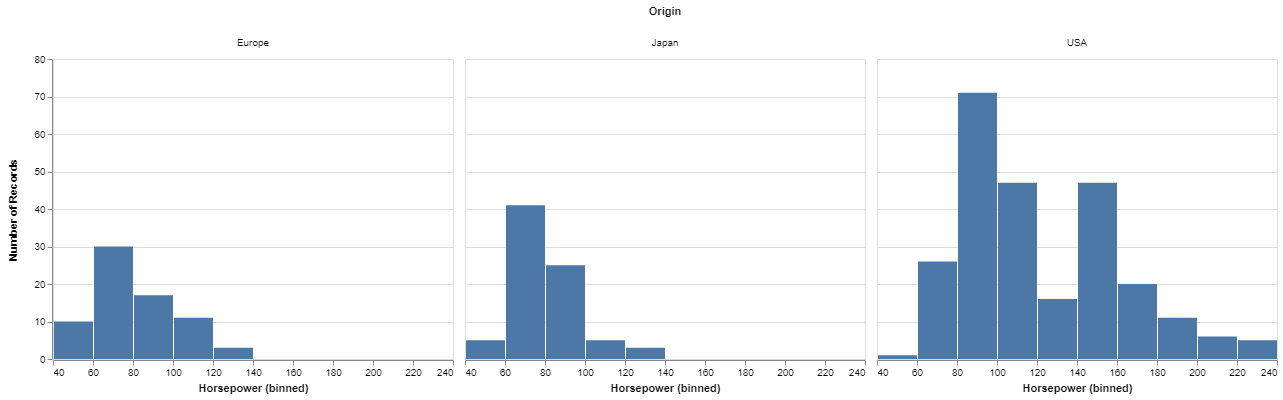

In [6]:
source = data.cars()

alt.Chart(source).mark_bar().encode(
    alt.X("Horsepower:Q", bin=True),
    y='count()',
    column='Origin'
)